In [1]:
import numpy as np
import matplotlib.pyplot as plt	

from _data import *

In [6]:
for variable, values in data['Sensor A'].items():
    if variable != 'FORMATTED DATE-TIME':
        name = ("%s [%s]:" % (variable, values['units']))
        print('\n', name, '_'*20, '\n')

        for sensor_name, sensor in data.items():
            print(sensor_name)
            v = sensor[variable]['values']
            print("    mean = %.4f  var = %.4f st.var. = %.4f" % (v.mean(), v.var(), v.std()))
  


 Direction ‚ True [nan]: ____________________ 

Sensor A
    mean = 209.4063  var = 10104.8575 st.var. = 100.5229
Sensor B
    mean = 183.4124  var = 9973.1882 st.var. = 99.8659
Sensor C
    mean = 183.5889  var = 7700.2494 st.var. = 87.7511
Sensor D
    mean = 198.3266  var = 8130.6023 st.var. = 90.1699
Sensor E
    mean = 223.9564  var = 9304.5242 st.var. = 96.4600

 Wind Speed [m/s]: ____________________ 

Sensor A
    mean = 1.2903  var = 1.2506 st.var. = 1.1183
Sensor B
    mean = 1.2421  var = 1.3010 st.var. = 1.1406
Sensor C
    mean = 1.3715  var = 1.4303 st.var. = 1.1960
Sensor D
    mean = 1.5816  var = 1.7391 st.var. = 1.3188
Sensor E
    mean = 0.5962  var = 0.5110 st.var. = 0.7149

 Crosswind Speed [m/s]: ____________________ 

Sensor A
    mean = 0.9649  var = 0.9262 st.var. = 0.9624
Sensor B
    mean = 0.8356  var = 0.8782 st.var. = 0.9371
Sensor C
    mean = 0.9633  var = 1.0422 st.var. = 1.0209
Sensor D
    mean = 1.2105  var = 1.4509 st.var. = 1.2045
Sensor E
    mea

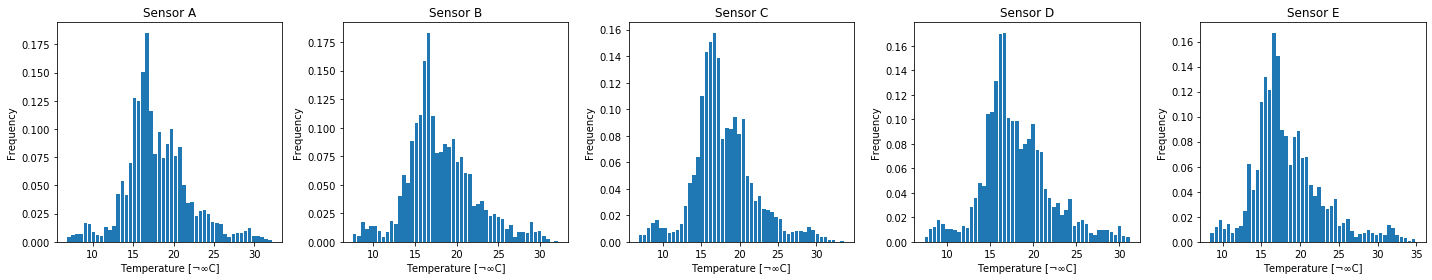

In [3]:
variable = 'Temperature'
bins = 50

fig = plt.figure(figsize=(20,4))

for i, (sensor_name, sensor) in enumerate(data.items()):
    ax_index = int(100 + 10*len(data) + i + 1)
    ax = fig.add_subplot(ax_index)
    ax.hist(x=sensor[variable]['values'], 
            bins=bins, density=True, rwidth=0.85)
    ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_ylabel('Frequency')
    ax.set_title(sensor_name)
    
plt.tight_layout()
plt.show()


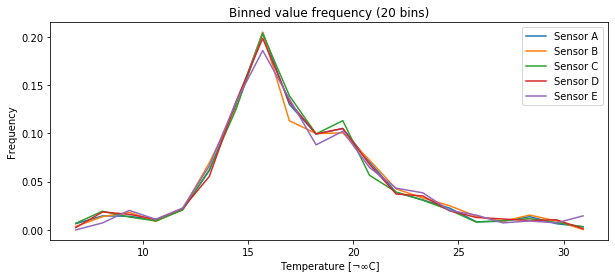

In [4]:
variable = 'Temperature'
bins = 20

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.set_title('Binned value frequency (%s bins)' % bins)

for sensor_name, sensor in data.items():
    values = sensor[variable]['values']
    [frequency, bins] = np.histogram(values, 
                                     bins=bins)
    frequency = [f/len(values) for f in frequency]
    ax.plot(bins[:-1], frequency, 
            label=sensor_name)
    ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_ylabel('Frequency')
    
plt.legend(loc='upper right')
plt.show()

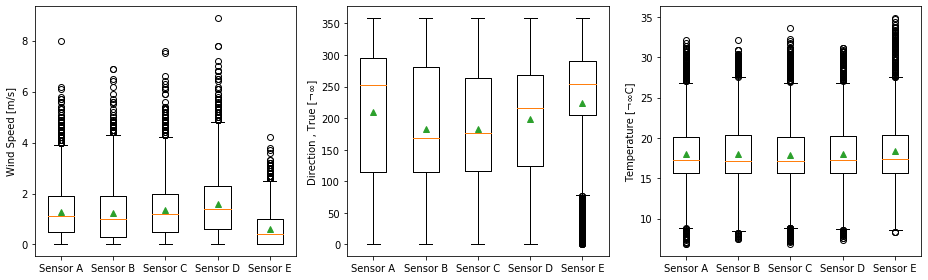

In [5]:
fig = plt.figure(figsize=(13,4))

subplots = [fig.add_subplot(131), 
            fig.add_subplot(132),
            fig.add_subplot(133)]

variables = ['Wind Speed', 
             'Direction ‚ True', 
             'Temperature']

for ax, variable in zip(subplots, variables):
    total_values = []
    for sensor_name, sensor in data.items():
        values = sensor[variable]['values']
        total_values.append(values)  
    ax.boxplot(total_values, showmeans=True, labels=data.keys())
    ax.set_ylabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_label(variable)
        
plt.tight_layout()
plt.show()
